In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
data = pd.read_csv("/kaggle/input/malwaredata/dynamic_api_call_sequence_per_malware_100_0_306.csv")
data.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [26]:
data.shape

(43876, 102)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43876 entries, 0 to 43875
Columns: 102 entries, hash to malware
dtypes: int64(101), object(1)
memory usage: 34.1+ MB


In [28]:
data1 = data.drop(columns=['hash'],axis=1)
data1 = data1.dropna(how='any')
print(data1.shape)

(43876, 101)


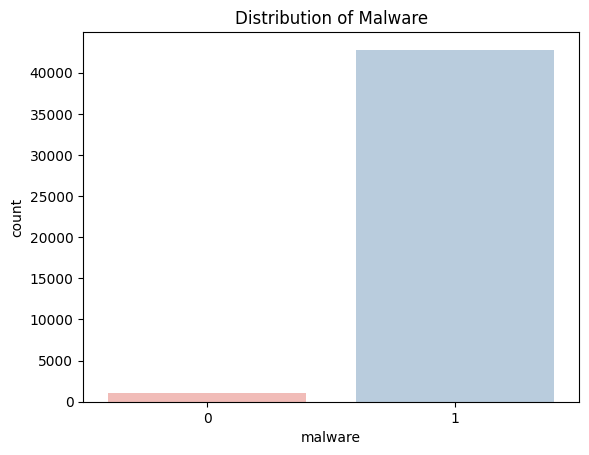

In [29]:
# Plot the distribution of the 'malware' column 
sns.countplot(x='malware', data=data1, palette="Pastel1")
plt.title('Distribution of Malware')
plt.show()

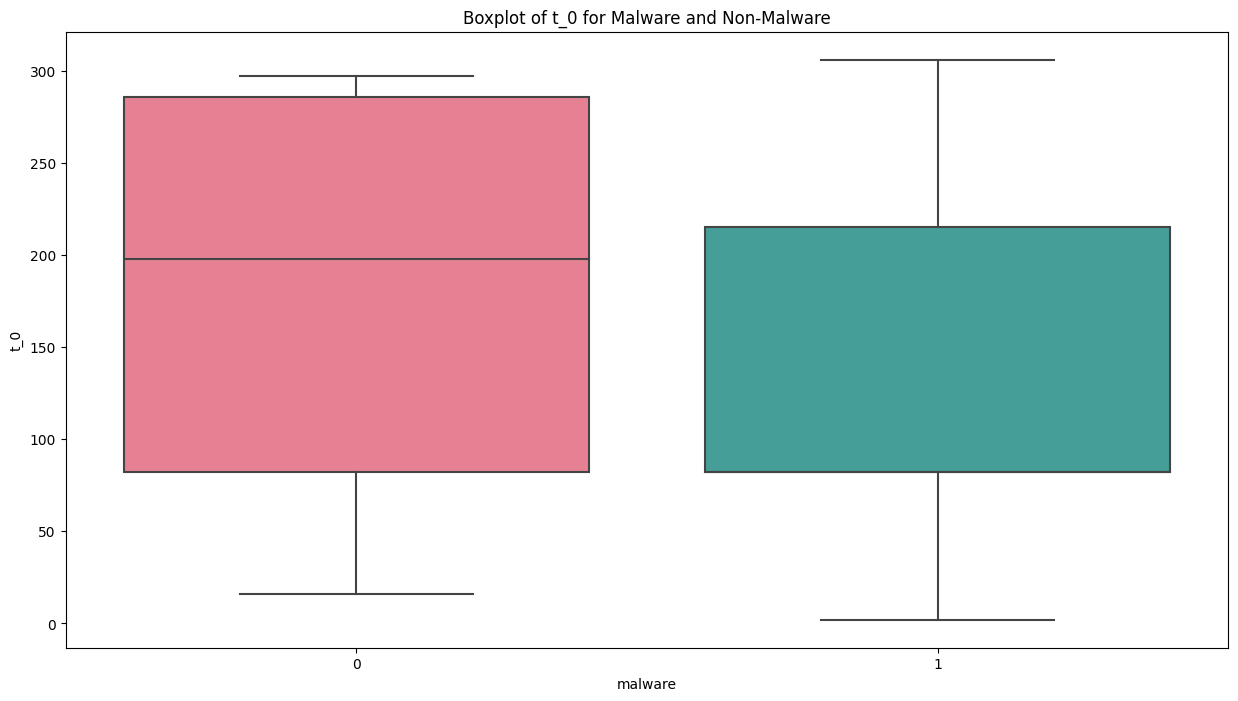

In [30]:
# Create a boxplot 
plt.figure(figsize=(15, 8))
sns.boxplot(x='malware', y='t_0', data=data1, palette="husl")
plt.title('Boxplot of t_0 for Malware and Non-Malware')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


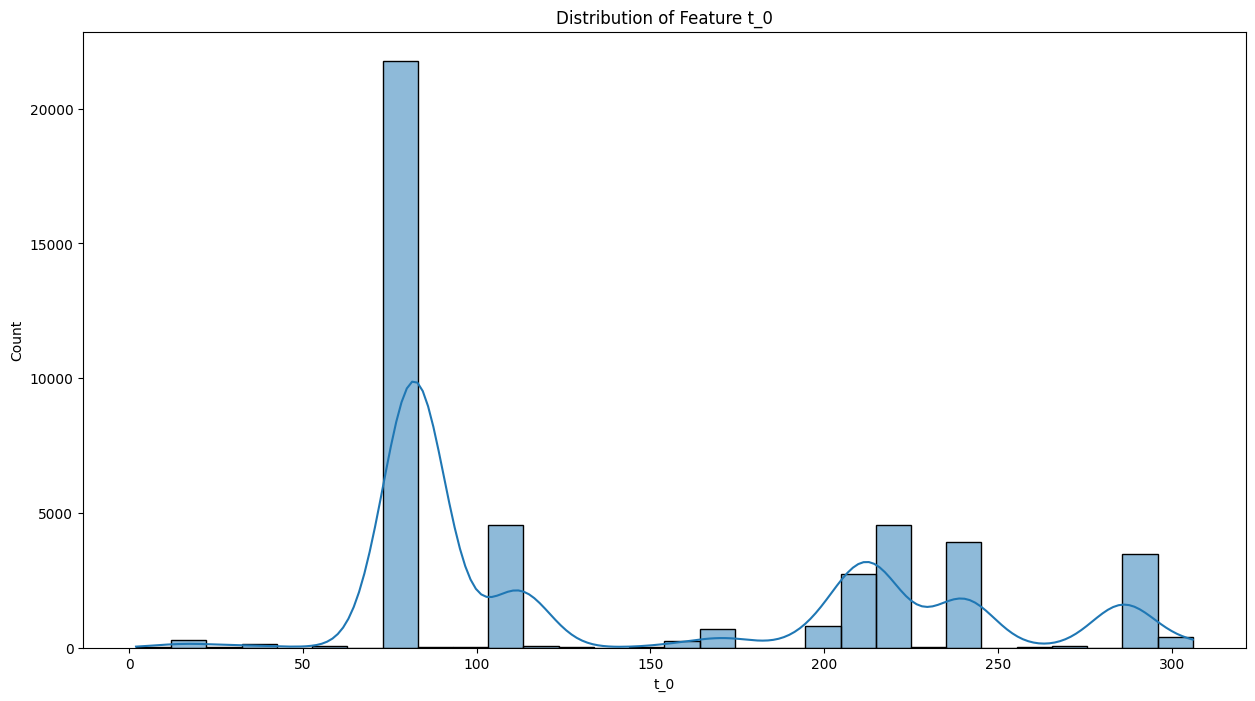

In [31]:
plt.figure(figsize=(15, 8))
sns.histplot(data1['t_0'], bins=30, kde=True)
plt.title('Distribution of Feature t_0')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Splitting the data
X = data1.drop('malware', axis=1)
y = data1['malware']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Build and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = mlp_model.predict(X_test_scaled)

In [39]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{class_report}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9868960802187785
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.58      0.70       226
           1       0.99      1.00      0.99      8550

    accuracy                           0.99      8776
   macro avg       0.93      0.79      0.84      8776
weighted avg       0.99      0.99      0.99      8776

Confusion Matrix:
[[ 132   94]
 [  21 8529]]


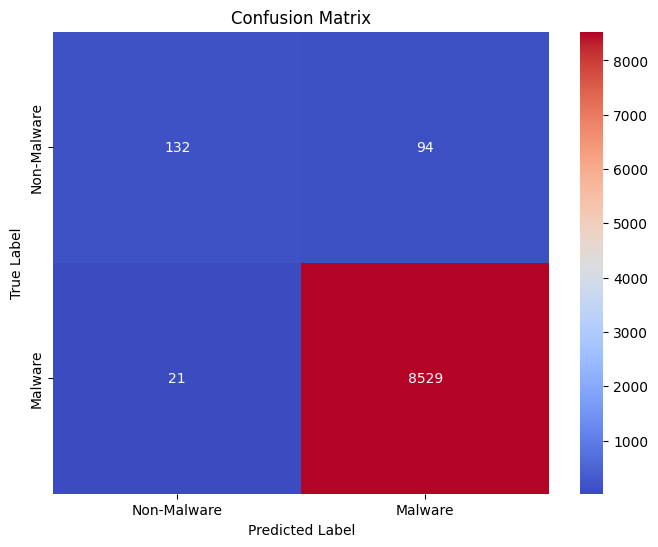

In [42]:
# Plot the heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Non-Malware', 'Malware'], 
            yticklabels=['Non-Malware', 'Malware'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

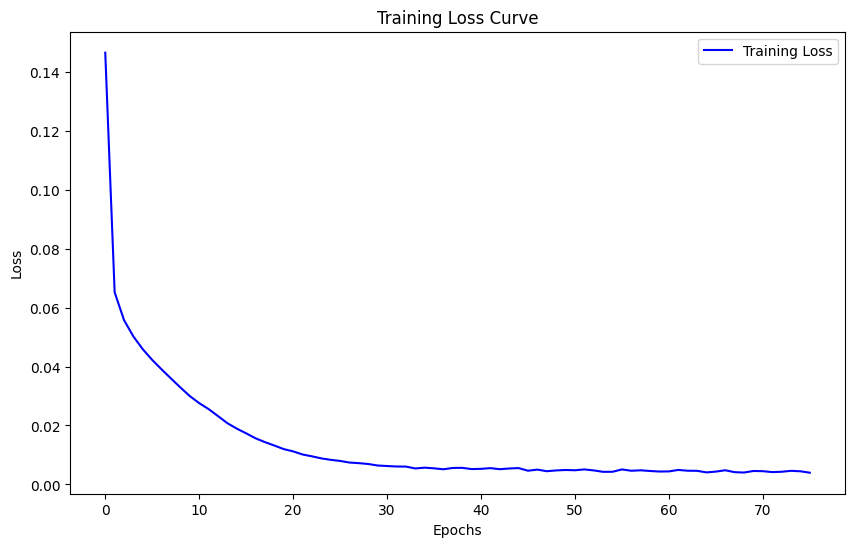

In [43]:
# Plotting the training loss curve
plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_, label='Training Loss', color='blue')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()